In [61]:
import numpy as np
import pickle 
import os
import matplotlib.pyplot as plt
from functools import partial
import os
import sys
sys.path.append(os.path.abspath('../'))
from plot_histograms import plot_and_save as _plot_and_save
plot_and_save = partial(_plot_and_save, work_dir='../results/plots/', show=True, figsize=(5, 3))

In [62]:
# https://stackoverflow.com/questions/26108436/how-can-i-get-the-matplotlib-rgb-color-given-the-colormap-name-boundrynorm-an
import matplotlib as mpl
from matplotlib import cm

class MplColorHelper:

  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

## Varying Depth

In [63]:
SRC = '../results/different_depth_7x5'

In [64]:
individual_z = pickle.load(open(os.path.join(SRC, 'black_z_distribution.pkl'), 'rb'))
individual_eps = pickle.load(open(os.path.join(SRC, 'eps_distribution.pkl'), 'rb'))
overall_z = pickle.load(open(os.path.join(SRC, 'overall_shifted_z_kde.pkl'), 'rb'))
individual_z.keys(), individual_eps.keys(), overall_z.keys()

(dict_keys([-335.4313059775113, -365.07513350765043, -398.3681955525825, -443.6414939721593, -500.3642163037694, -553.8129857007822, -590.7573390971004, -622.698053864951, -651.1602627484608, -680.0569475750427, -704.19421328807, -752.6090342518044, -781.3063947905417, -840.1391458224938, -856.5973434541658, -914.0234031084786, -931.111134715825]),
 dict_keys([-335.4313059775113, -365.07513350765043, -398.3681955525825, -443.6414939721593, -500.3642163037694, -553.8129857007822, -590.7573390971004, -622.698053864951, -651.1602627484608, -680.0569475750427, -704.19421328807, -752.6090342518044, -781.3063947905417, -840.1391458224938, -856.5973434541658, -914.0234031084786, -931.111134715825]),
 dict_keys(['shifted_z_probs']))

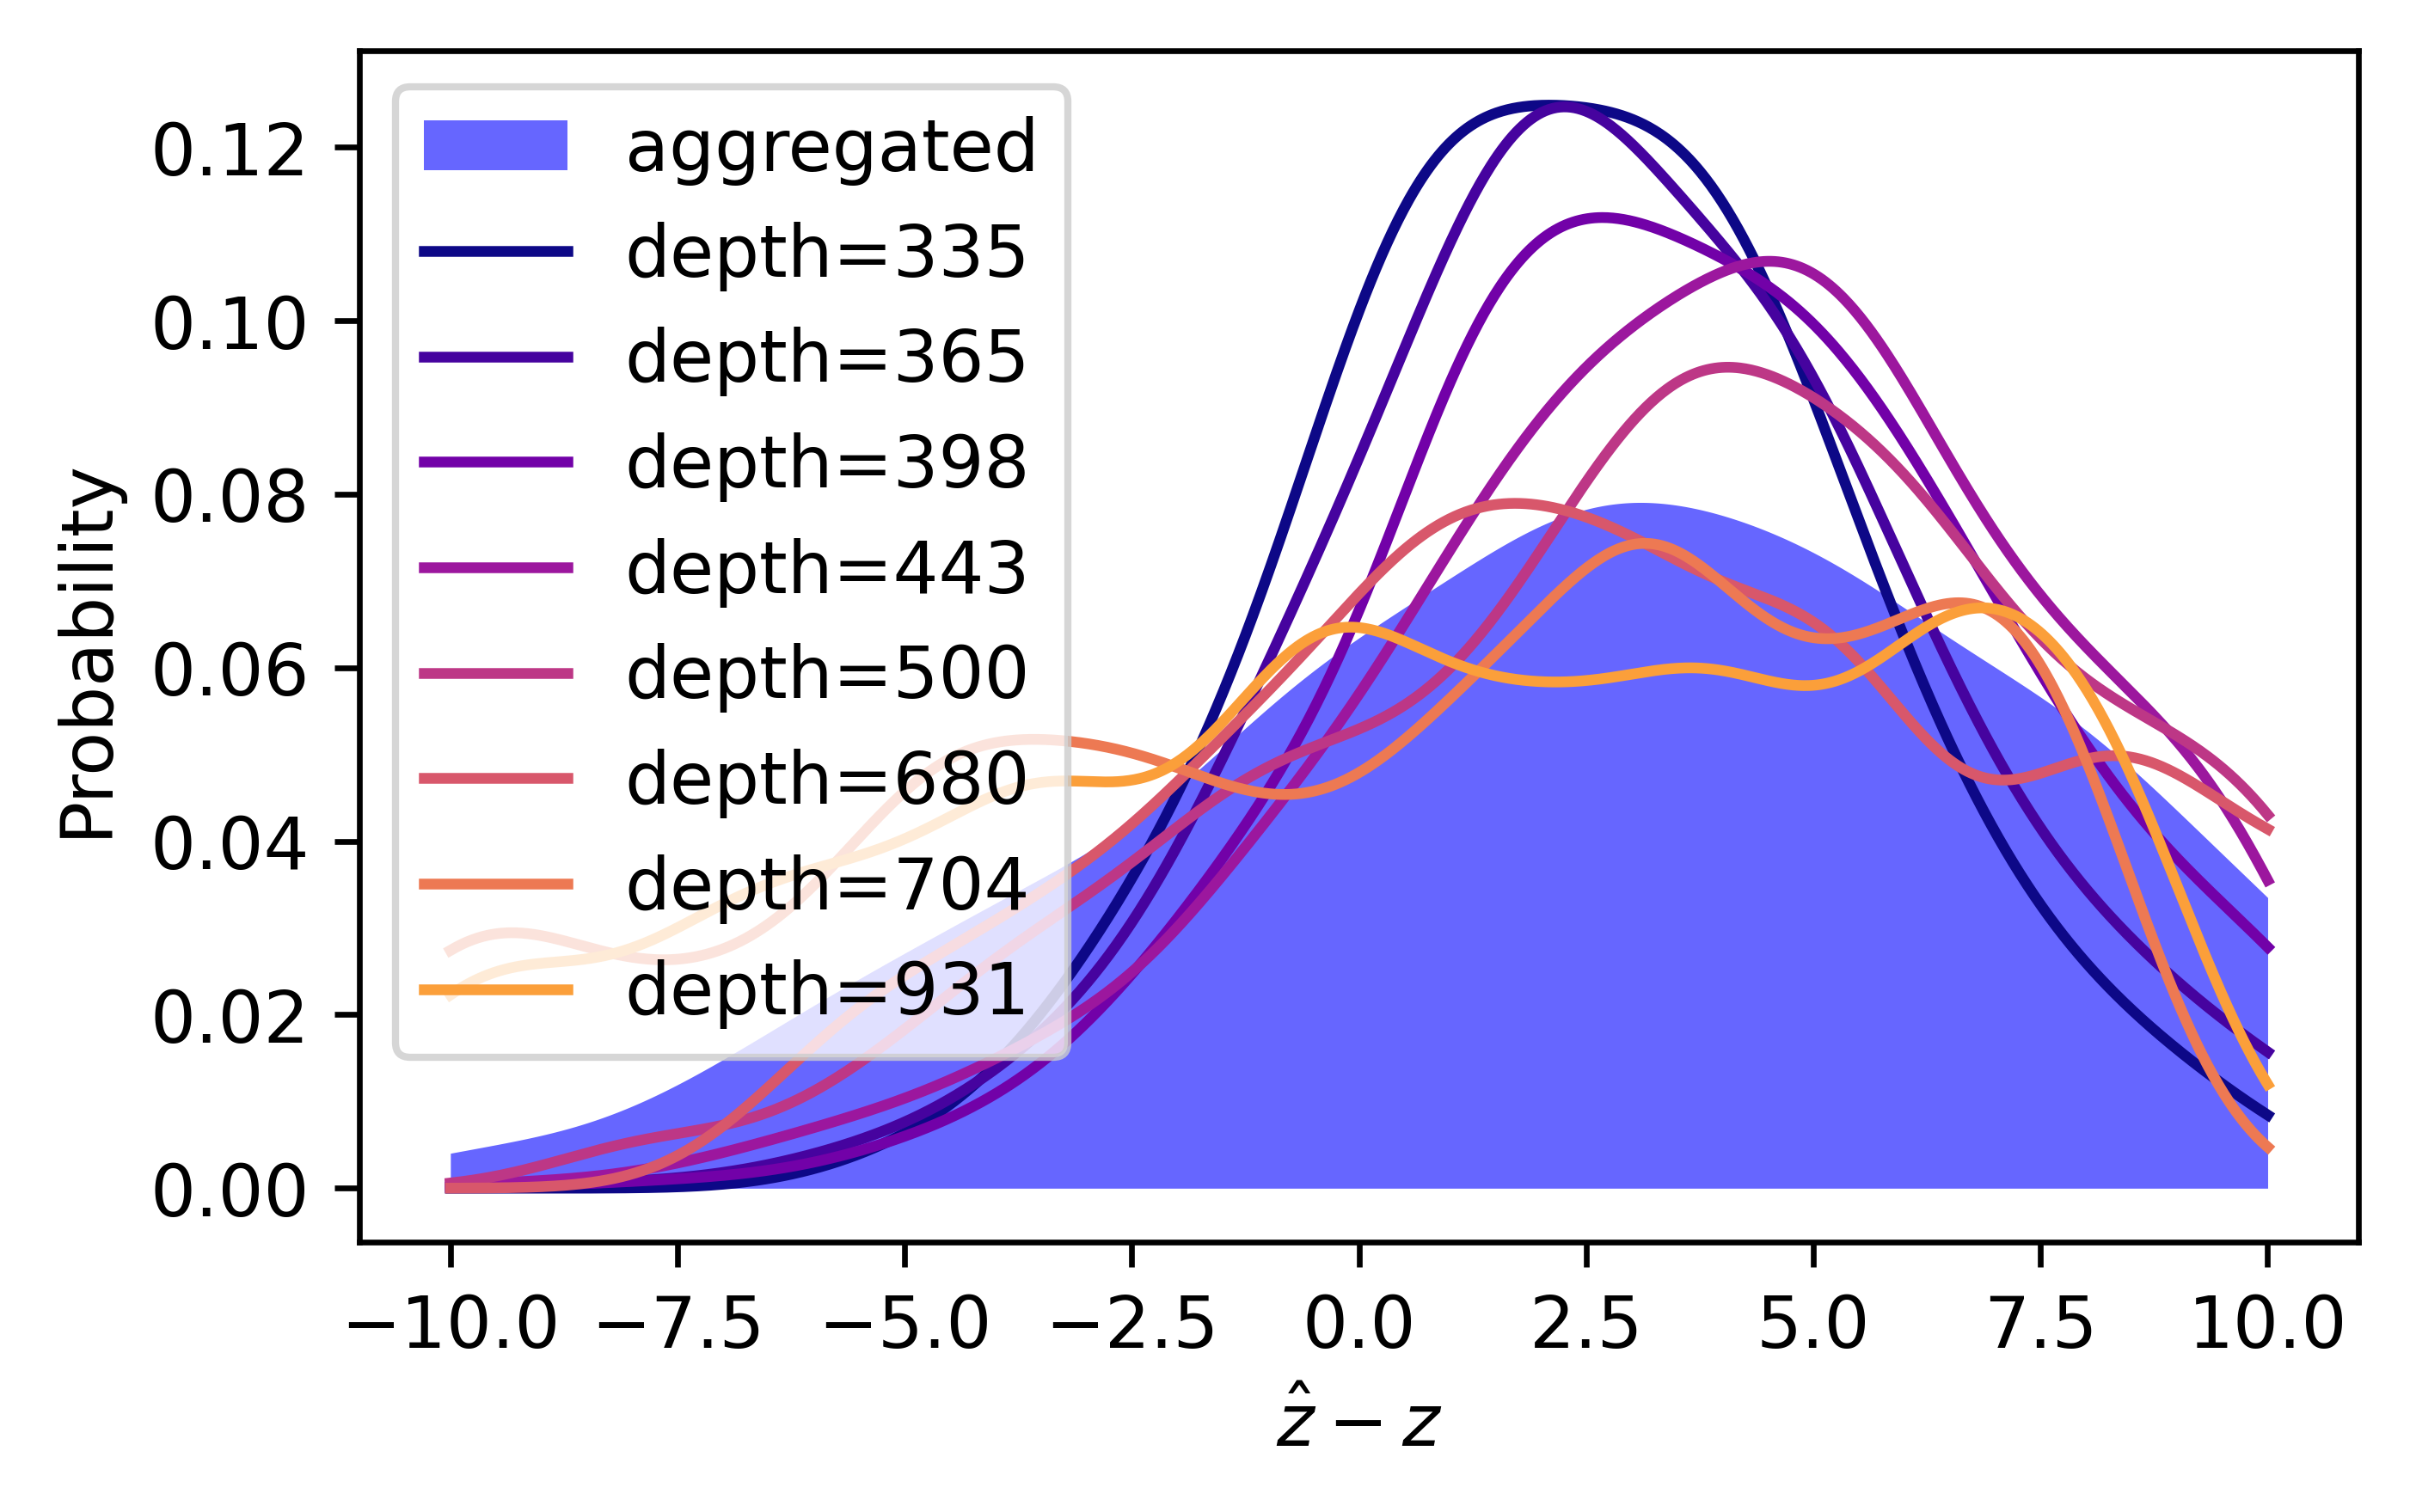

In [65]:
selected_depths = (335, 365, 398, 443, 500, 680, 591, 704, 931)
with plot_and_save('selected_depths'):
    xs = np.linspace(-10, 10, 1000)
    colors = MplColorHelper('plasma', 0, len(selected_depths))
    # plt.plot(xs, overall_z['shifted_z_probs'], label='overall', color='red', linestyle='--')
    plt.fill_between(xs, overall_z['shifted_z_probs'], color='blue', alpha=0.6, label='aggregated', linewidth=0.0)
    chosen_depths = []
    idx = 0
    for d, stats in individual_z.items():
        probs = stats['probs']
        depth = -int(d)
        if depth in selected_depths:
            plt.plot(xs, probs, label=f'depth={depth}', color=colors.get_rgb(idx))
            idx += 1
    plt.ylabel('Probability')
    plt.xlabel(r'$\hat{z} - z$')
    plt.legend()

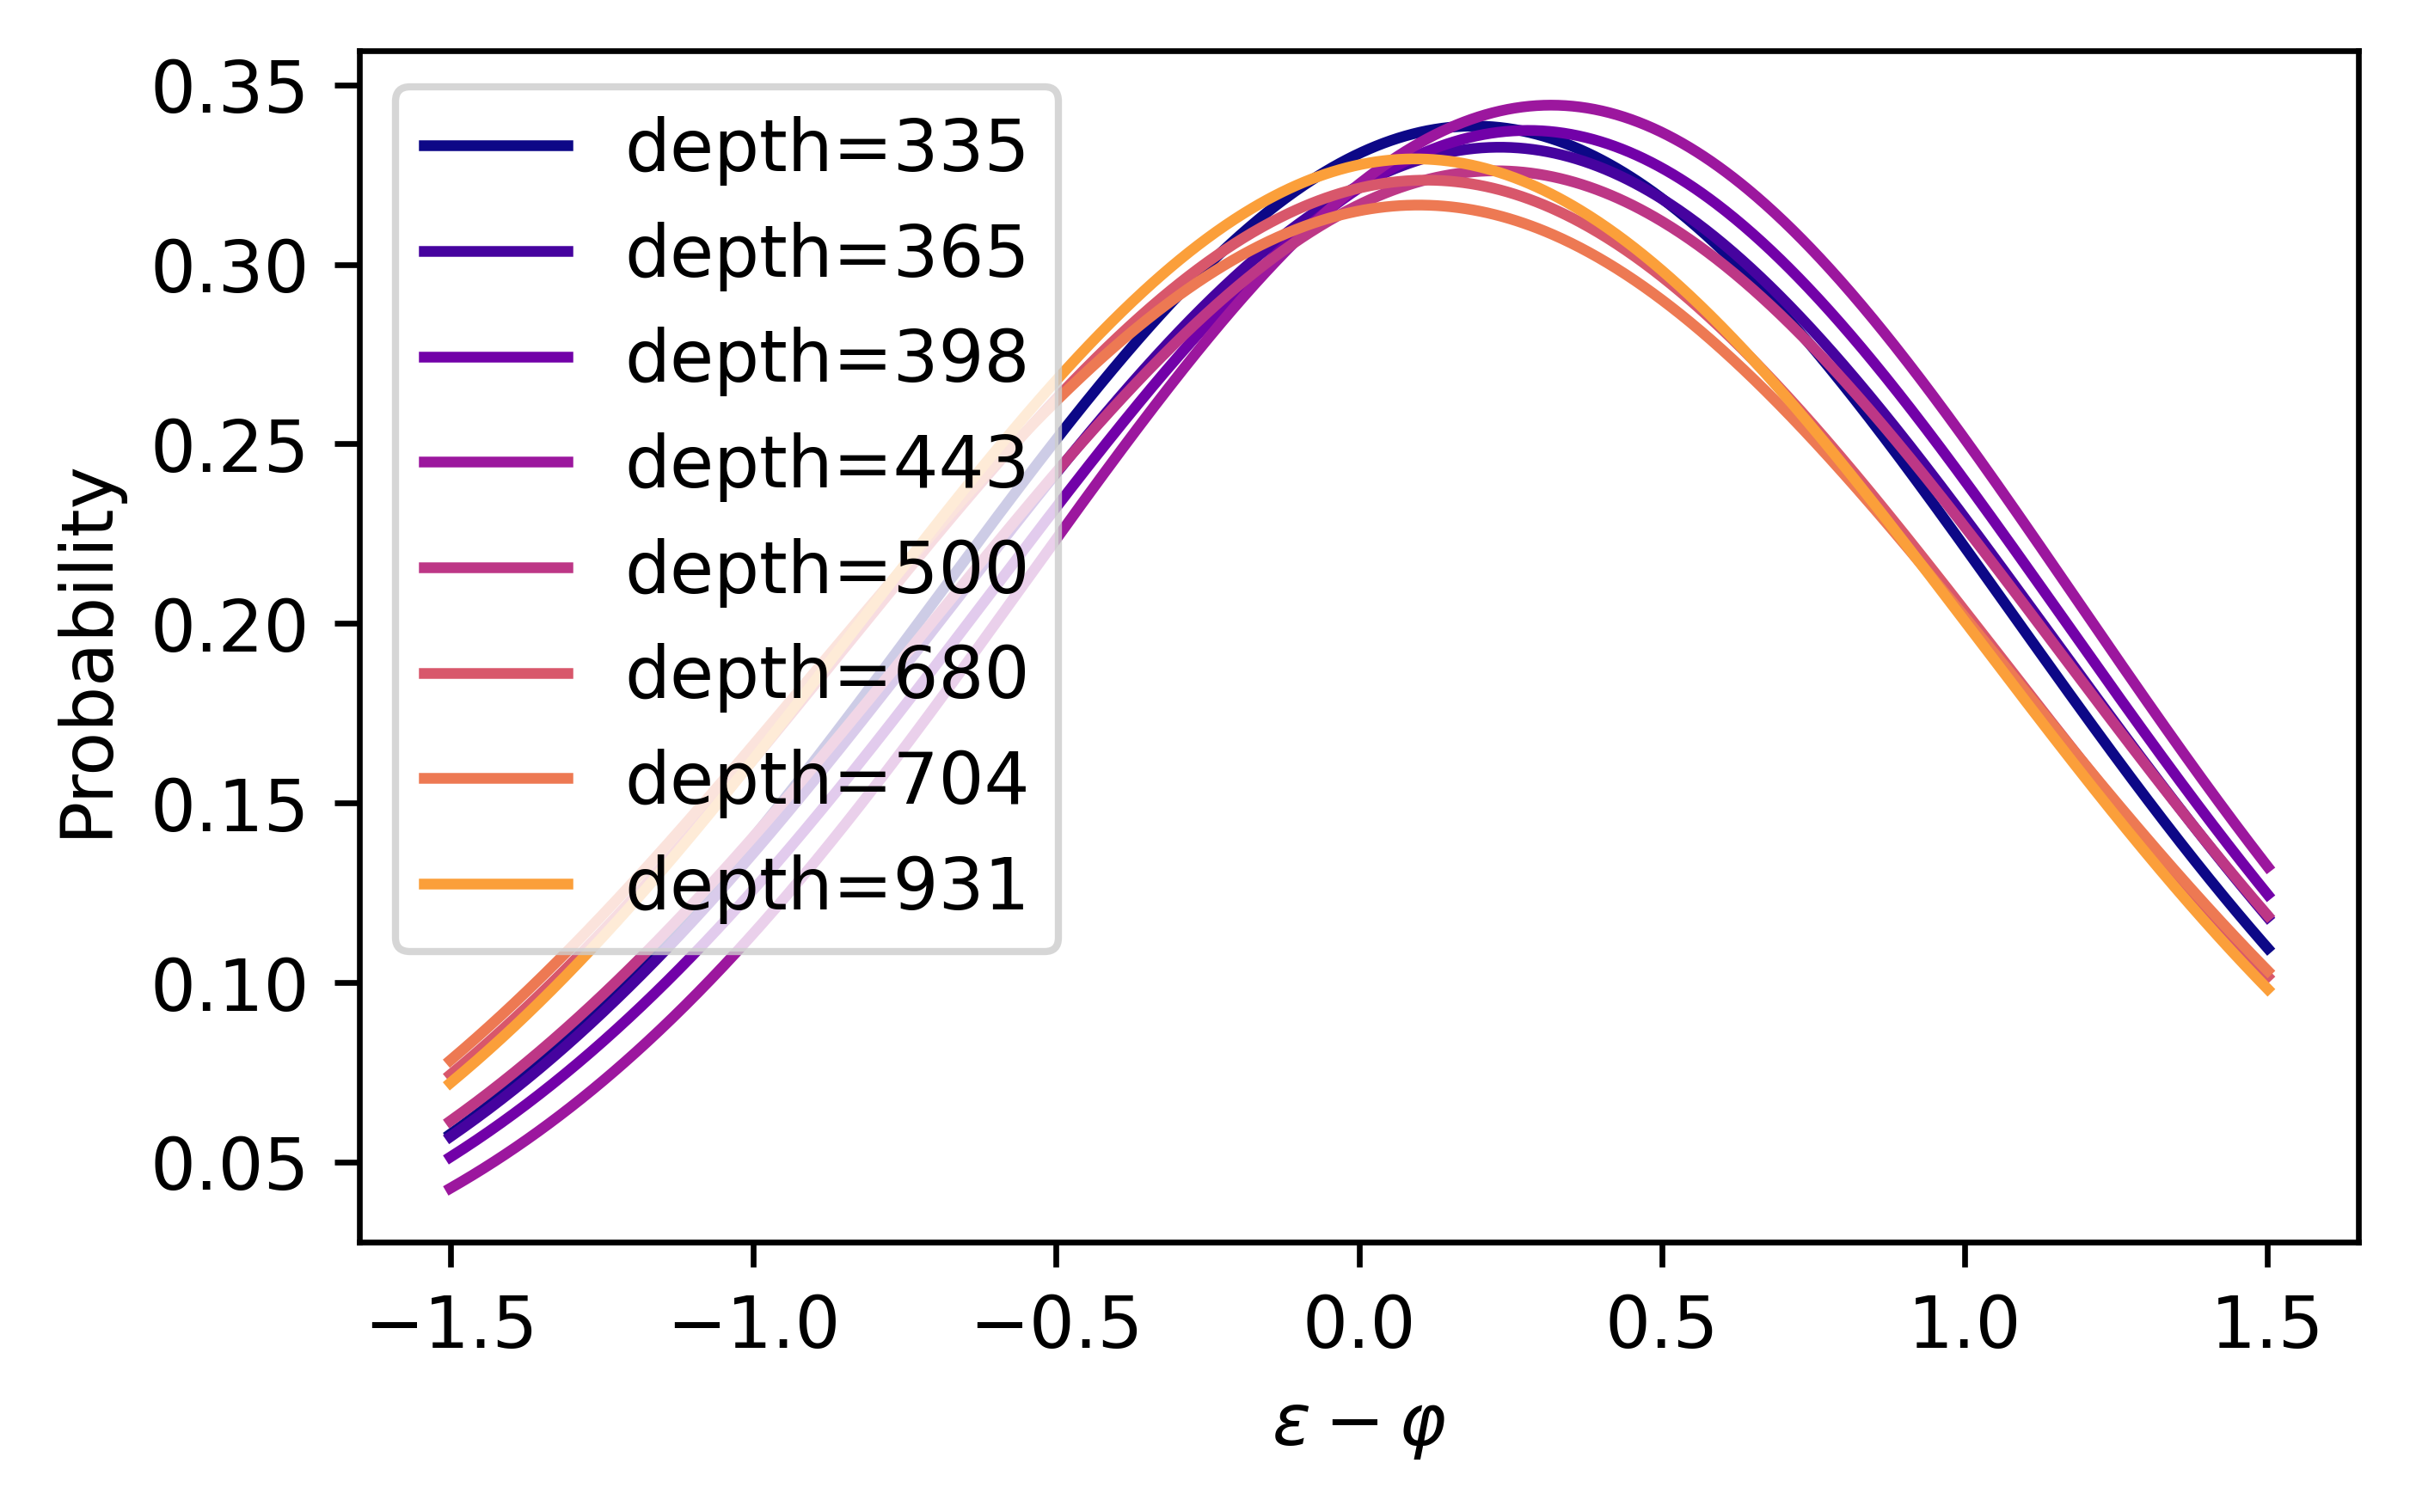

In [78]:
selected_depths = (335, 365, 398, 443, 500, 680, 591, 704, 931)
with plot_and_save('selected_depths_eps'):
    phis = np.linspace(-1.5, 1.5, 1000)
    colors = MplColorHelper('plasma', 0, len(selected_depths))
    chosen_depths = []
    idx = 0
    for d, stats in individual_eps.items():
        probs = stats['probs']
        depth = -int(d)
        if depth in selected_depths:
            plt.plot(phis, probs, label=f'depth={depth}', color=colors.get_rgb(idx))
            idx += 1
    plt.ylabel('Probability')
    plt.xlabel(r'$\epsilon - \varphi$')
    plt.legend(loc='upper left')

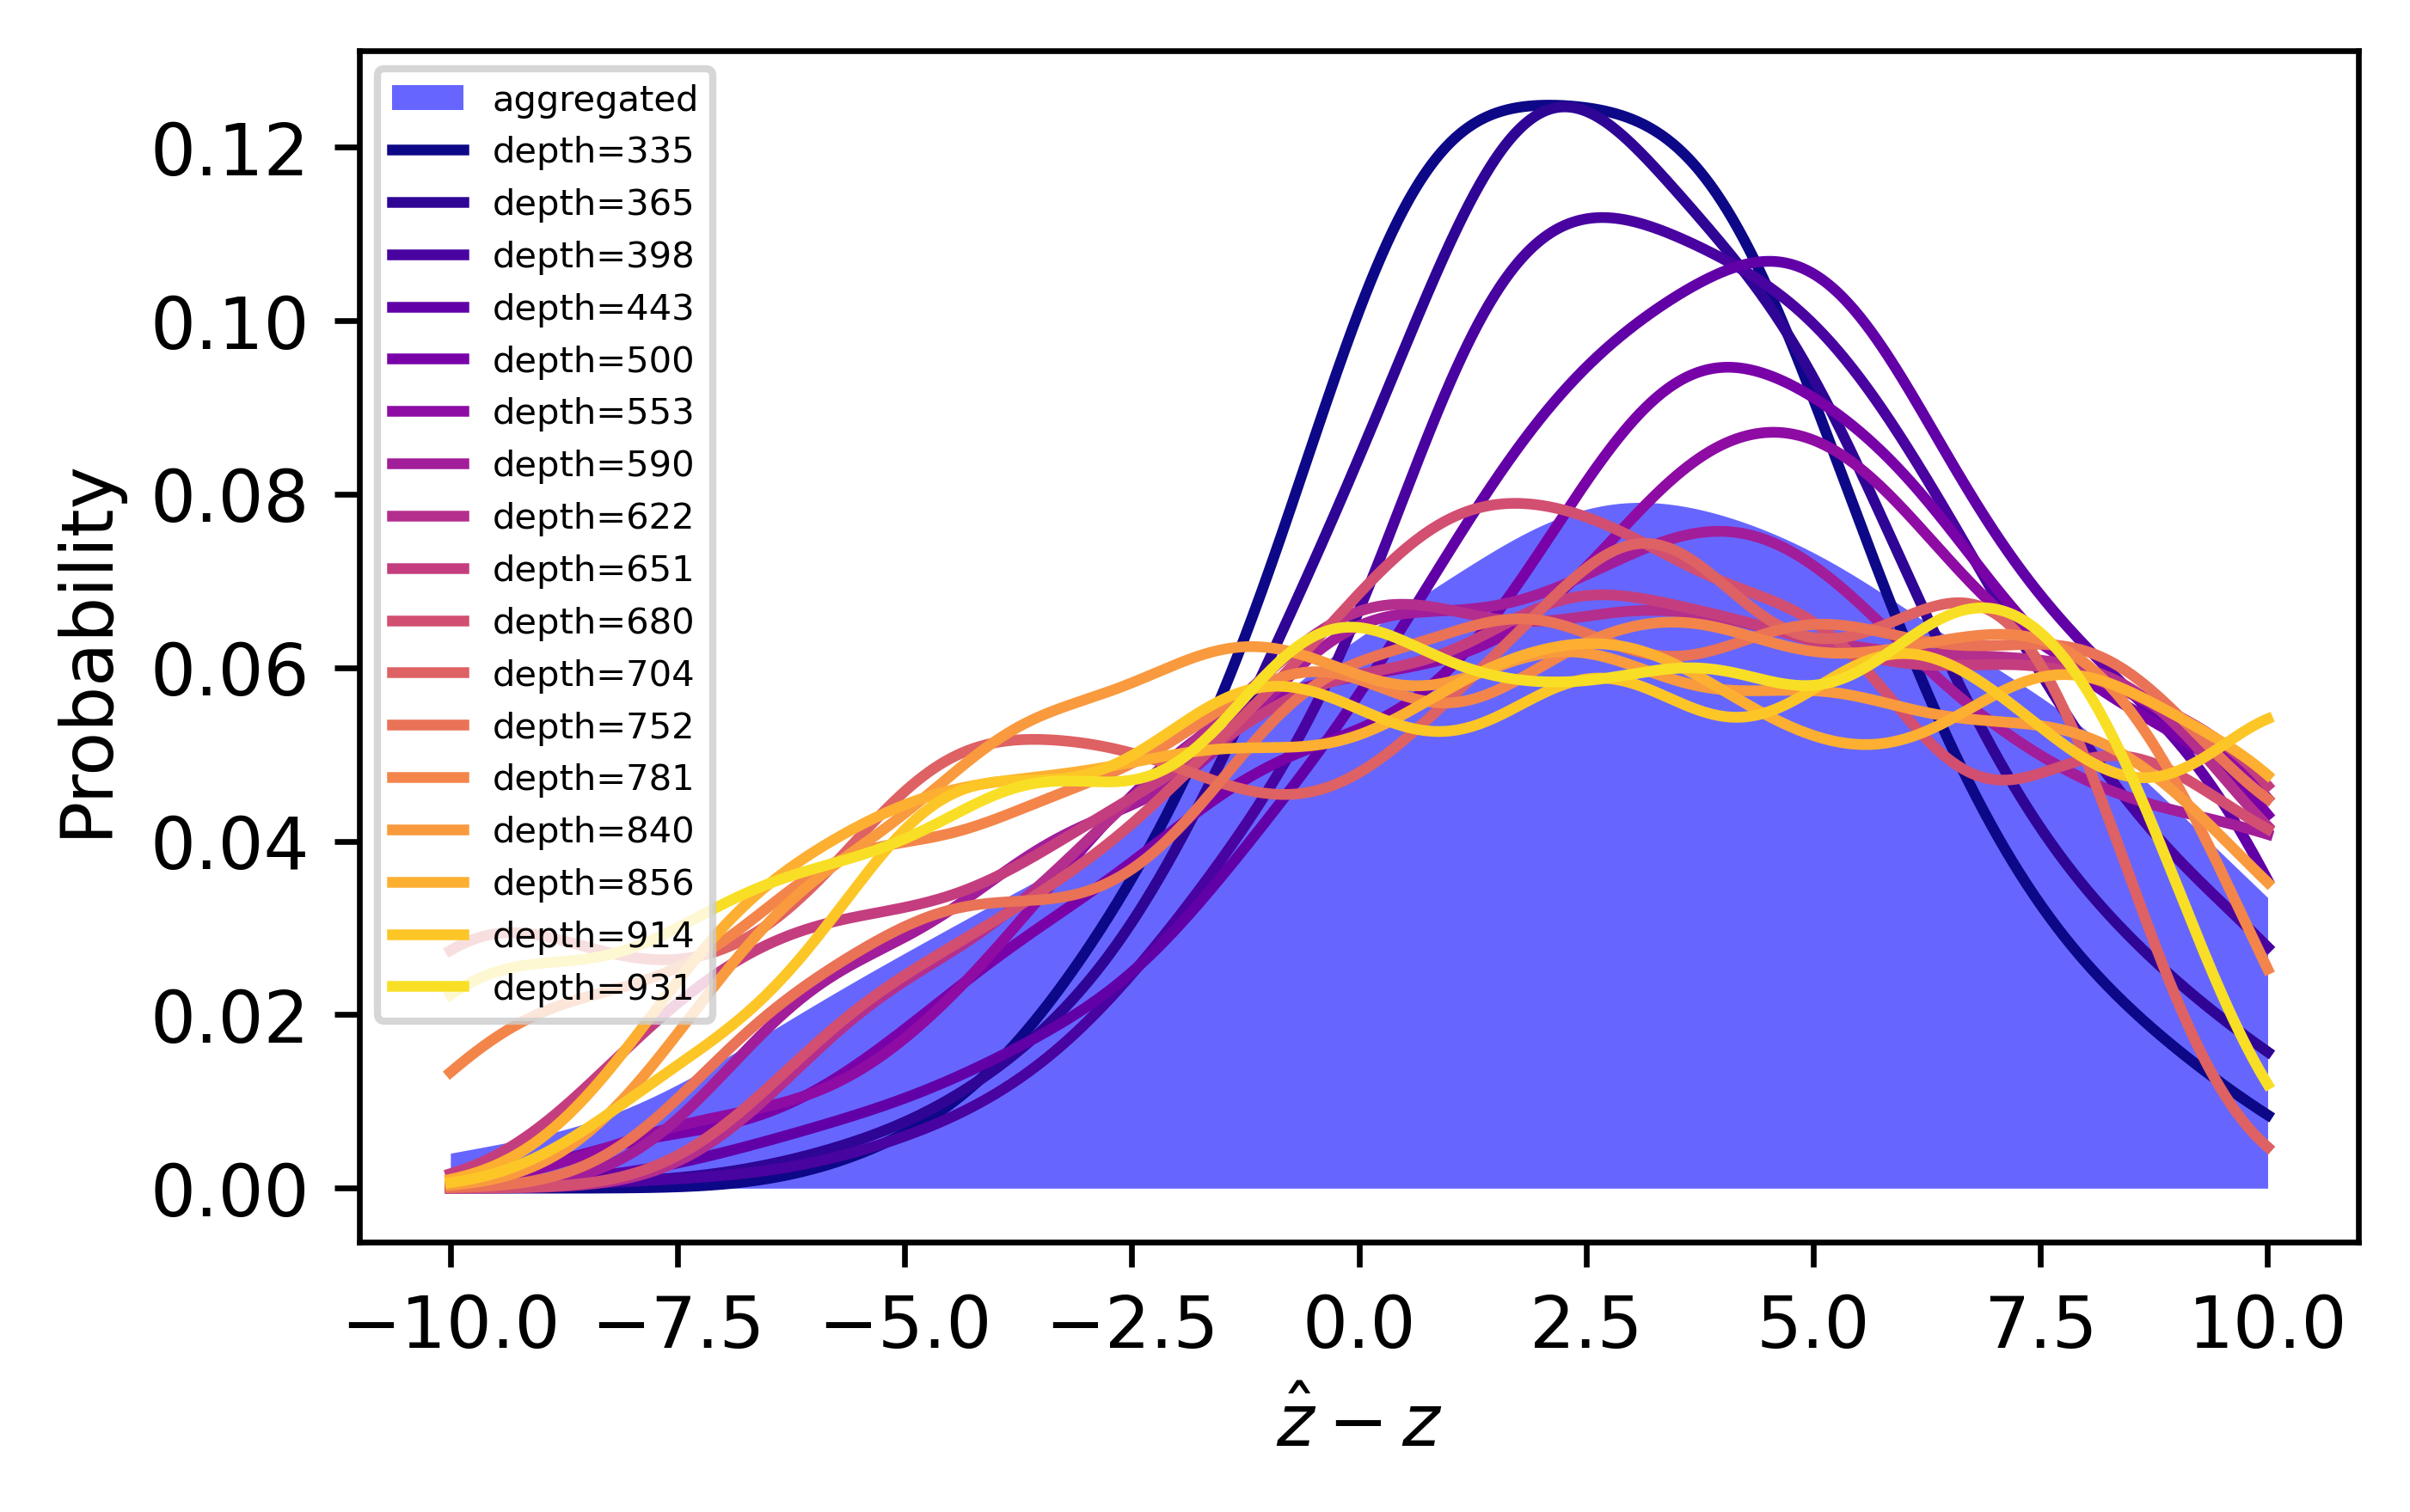

In [67]:
with plot_and_save('all_depths'):
    xs = np.linspace(-10, 10, 1000)
    colors = MplColorHelper('plasma', 0, len(individual_z))
    plt.fill_between(xs, overall_z['shifted_z_probs'], color='blue', alpha=0.6, label='aggregated', linewidth=0.0)
    idx = 0
    for d, data in individual_z.items():
        probs = data['probs']
        depth = -int(d)
        plt.plot(xs, probs, label=f'depth={depth}', color=colors.get_rgb(idx))
        idx += 1
    plt.ylabel('Probability')
    plt.xlabel(r'$\hat{z} - z$')
    plt.legend(fontsize=5)

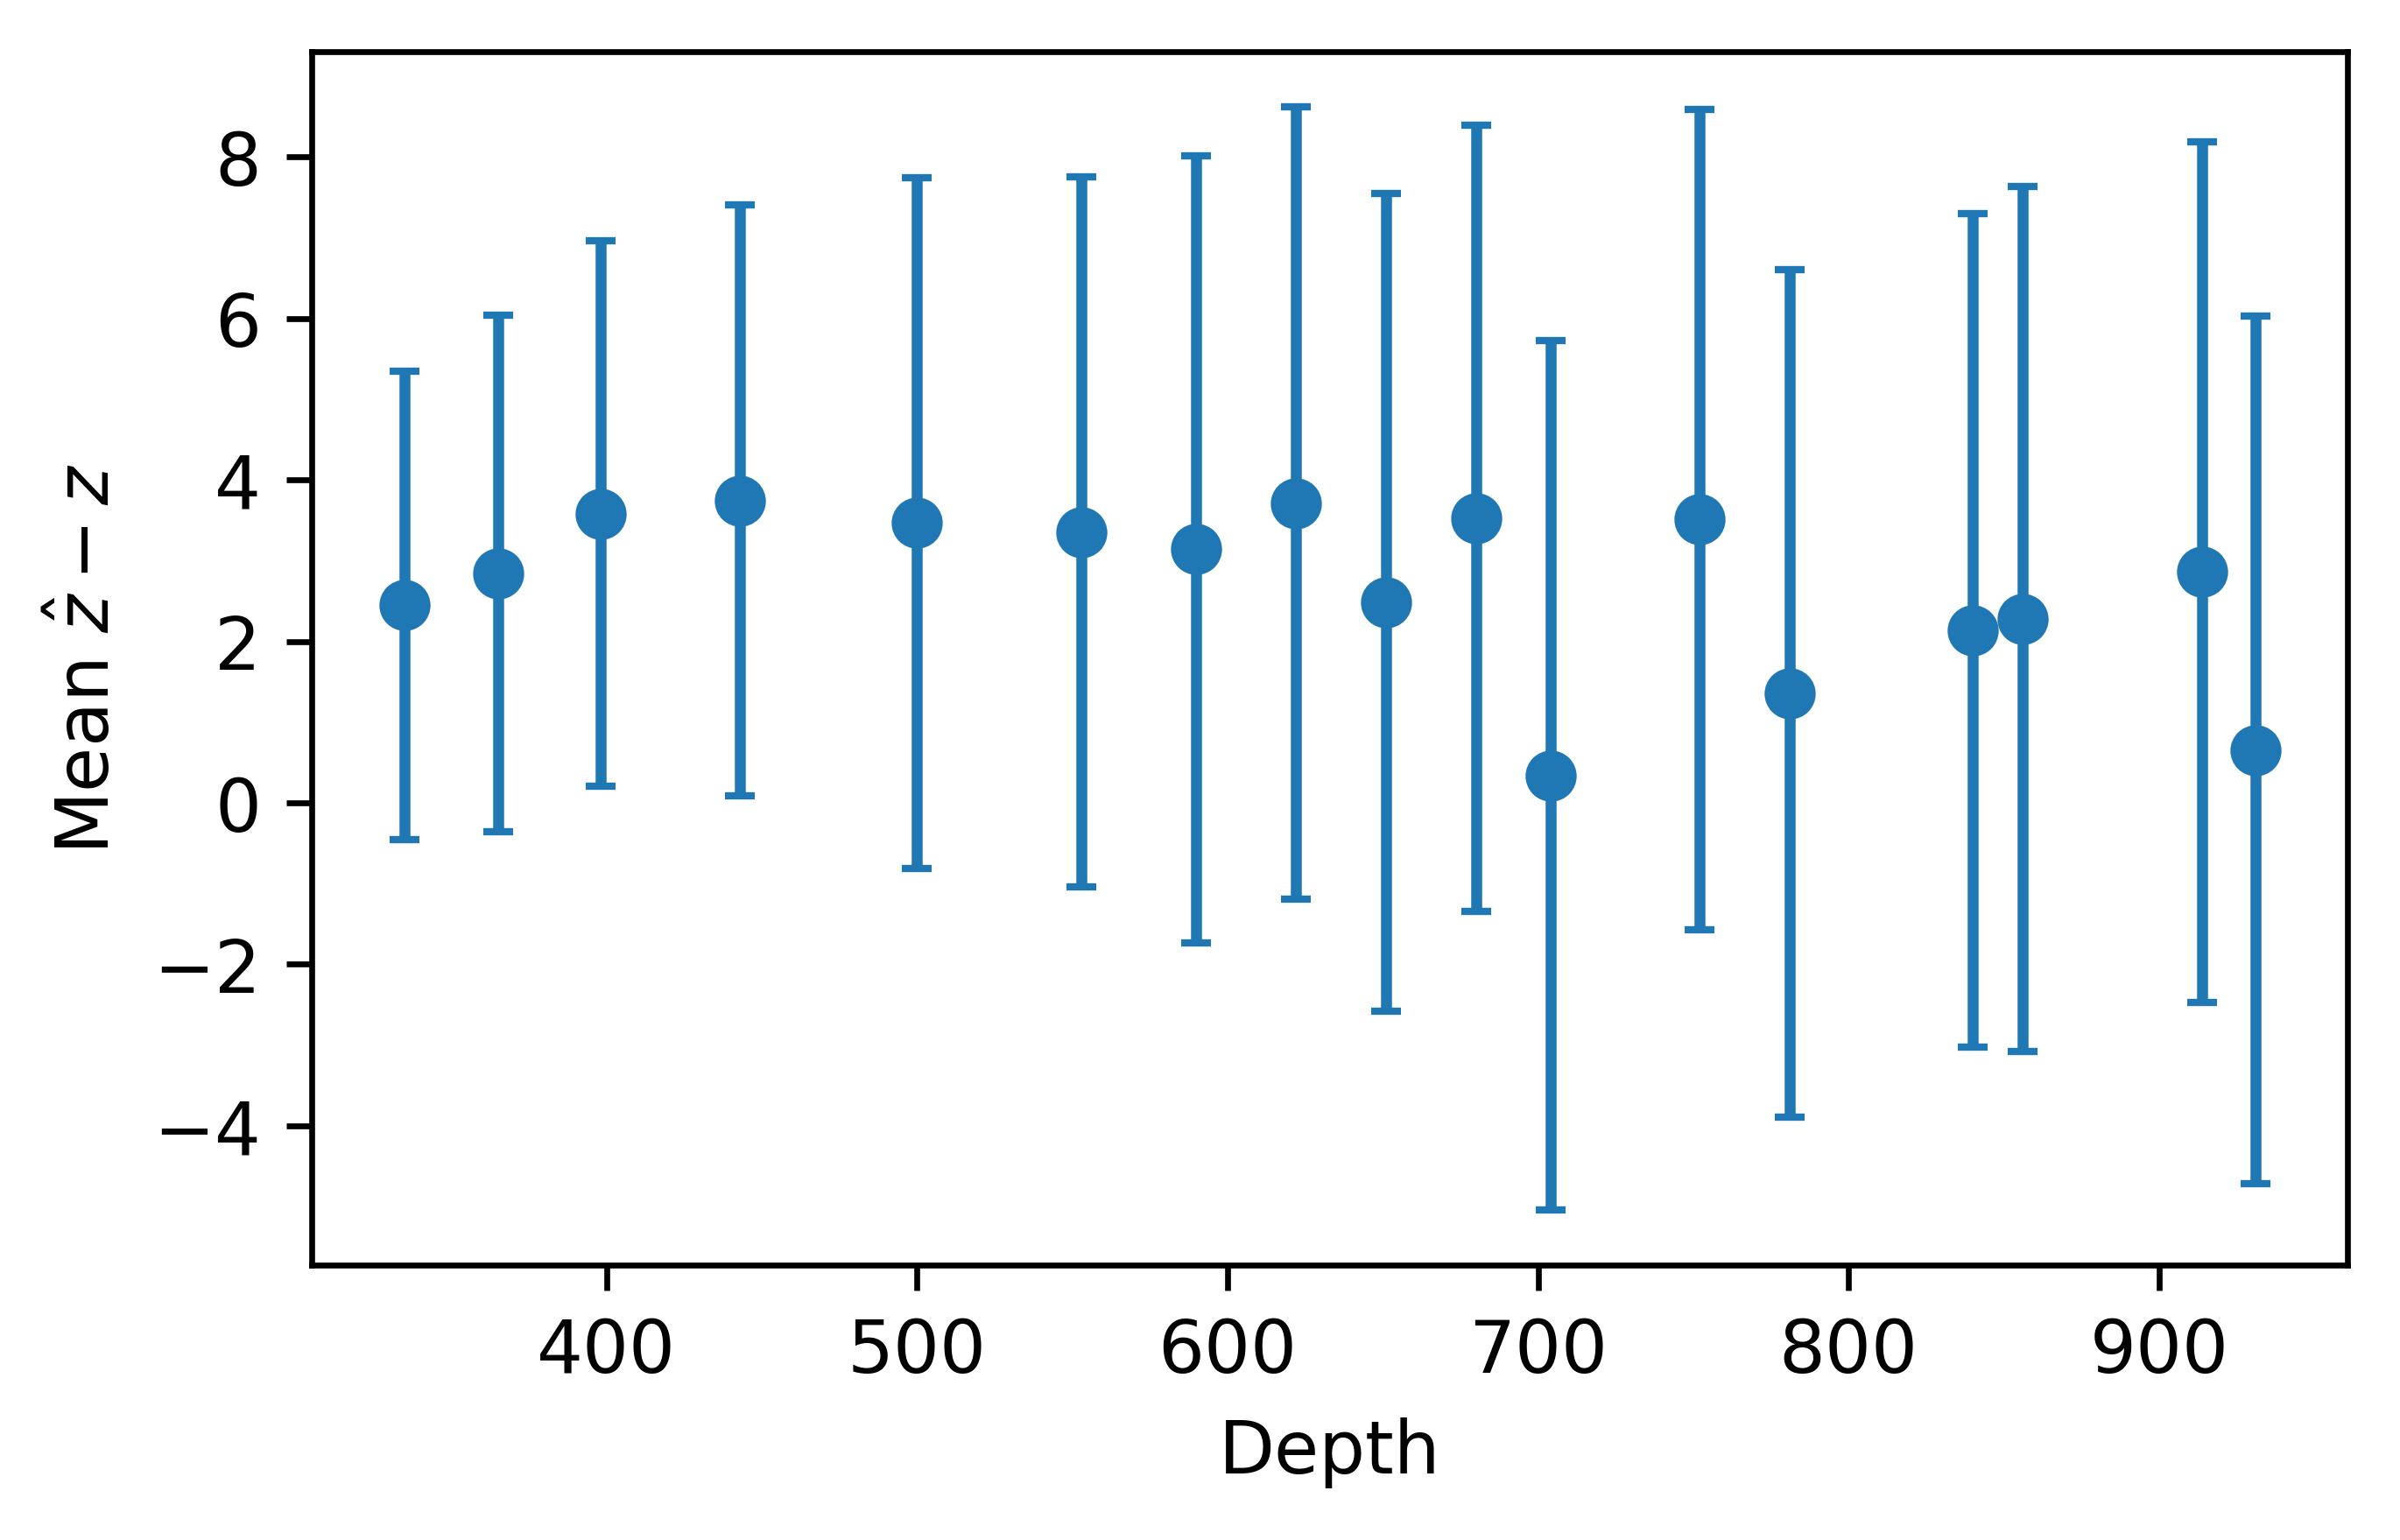

In [68]:
with plot_and_save('depth_mean_and_std'):
    depths = []
    mean_values = []
    std_values = []
    for d, stats in individual_z.items():
        probs = stats['probs']
        depth = -int(d)
        depths.append(depth)
        mean_values.append(stats['mean'])
        std_values.append(stats['std'])
    plt.errorbar(depths, mean_values, yerr=std_values, fmt='o', capsize=2)
    plt.xlabel('Depth')
    plt.ylabel('Mean $\\hat{z} - z$')

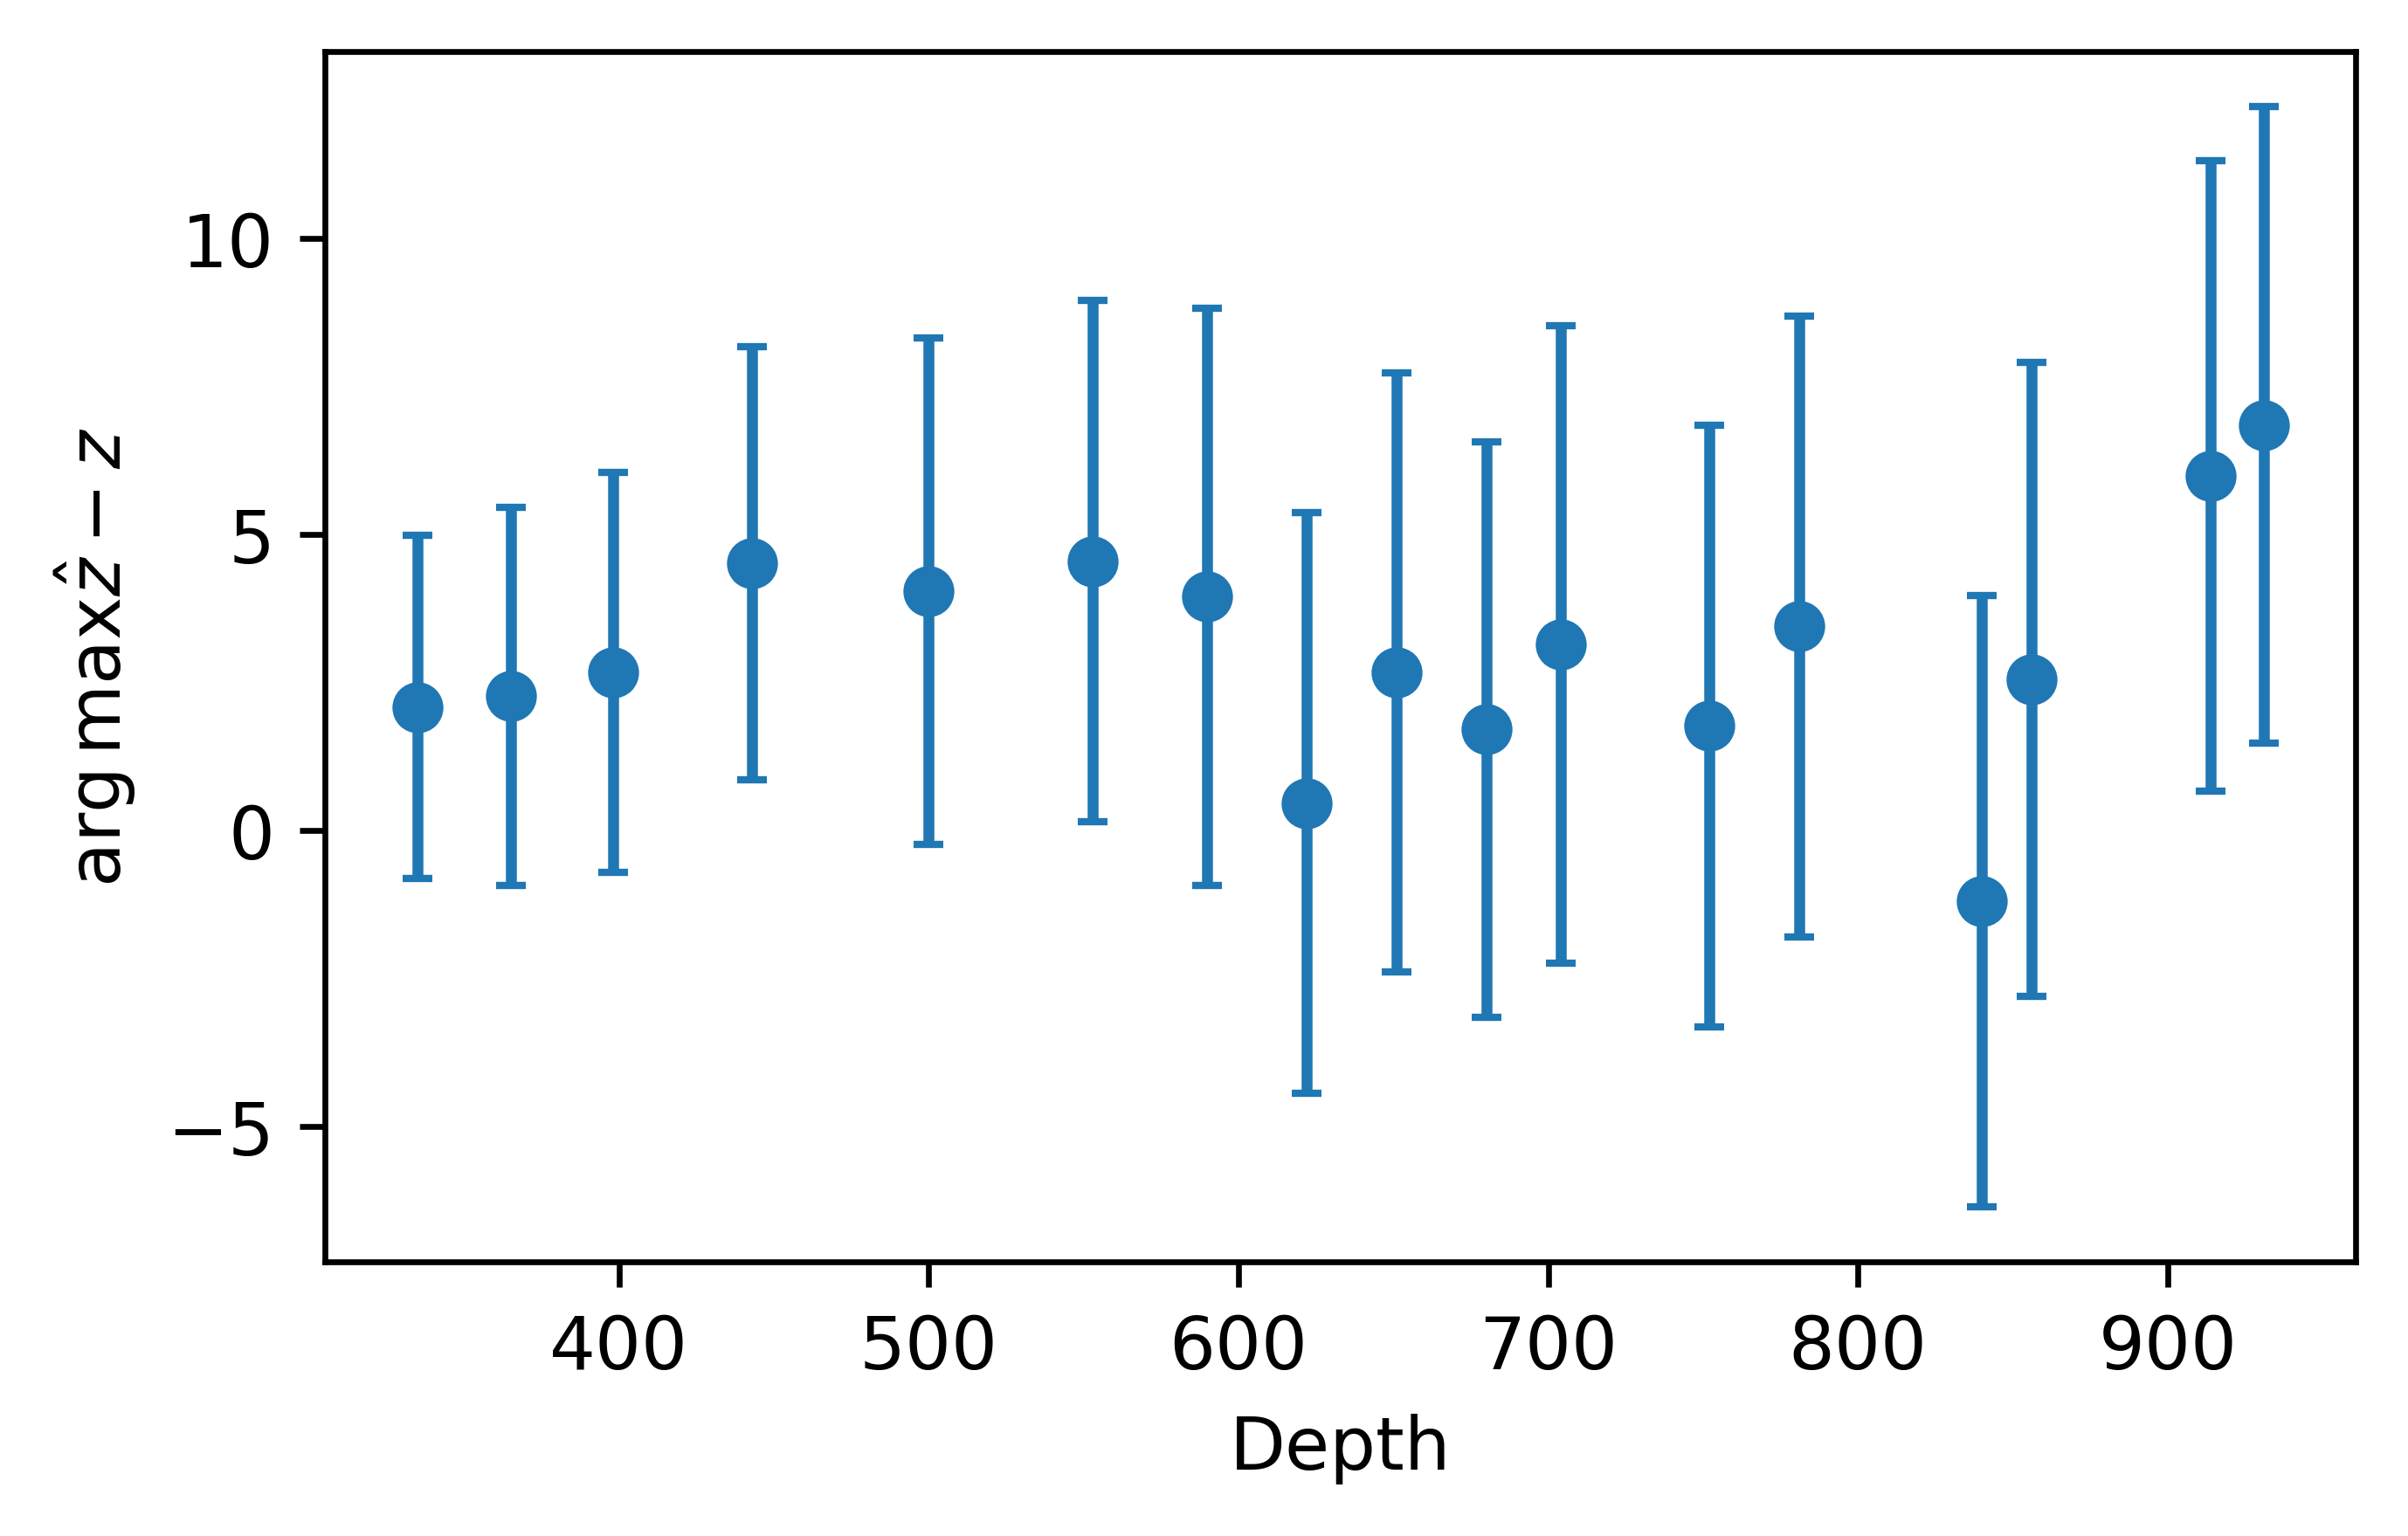

In [69]:
with plot_and_save('depth_mode_and_std'):
    xs = np.linspace(-10, 10, 1000)
    depths = []
    modes = []
    stds = []
    for d, stats in individual_z.items():
        probs = stats['probs']
        depth = -int(d)
        depths.append(depth)
        modes.append(xs[np.argmax(probs)])
        stds.append(stats['std'])
    plt.errorbar(depths, modes, yerr=std_values, fmt='o', capsize=2)
    plt.xlabel('Depth')
    plt.ylabel(r'$\arg\max\hat{z} - z$')

## Varying Albedo

In [70]:
SRC = '../results/varying_albedo_7x5'

In [71]:
individual_z = pickle.load(open(os.path.join(SRC, 'black_z_distribution.pkl'), 'rb'))
overall_z = pickle.load(open(os.path.join(SRC, 'overall_shifted_z_kde.pkl'), 'rb'))
individual_z.keys(), overall_z.keys()

(dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
 dict_keys(['shifted_z_probs']))

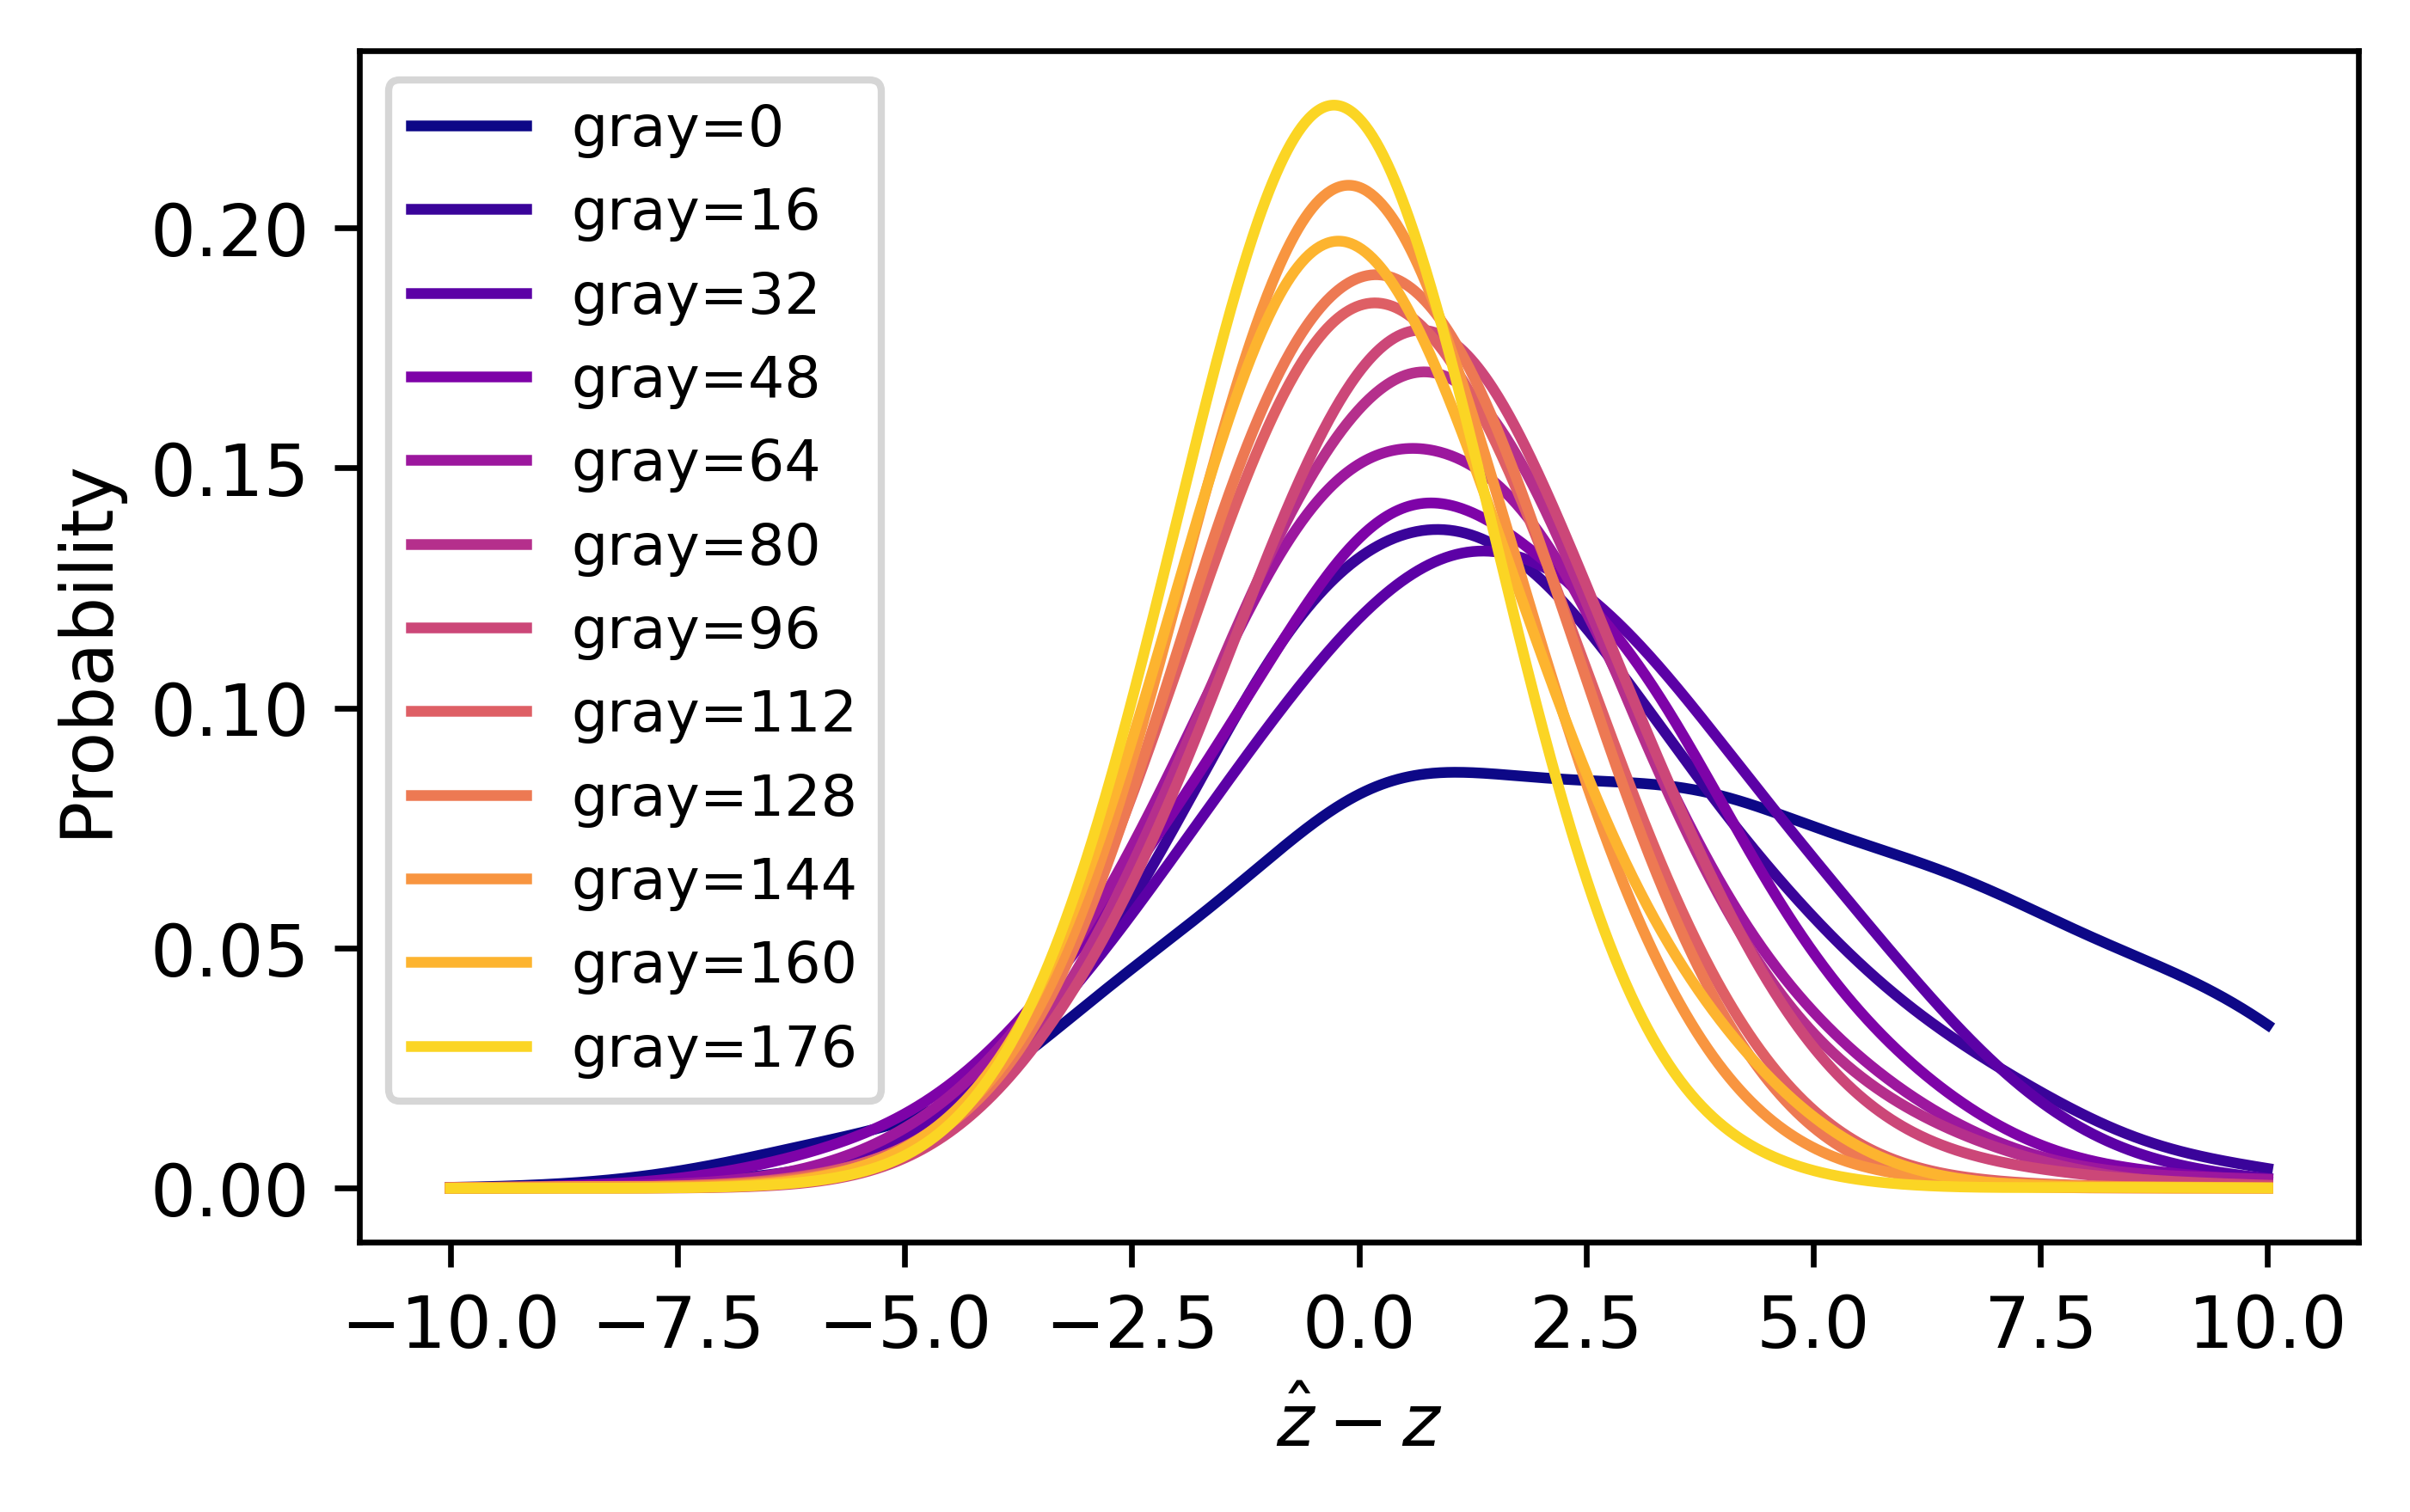

In [77]:
with plot_and_save('varying_albedo'):
    xs = np.linspace(-10, 10, 1000)
    colors = MplColorHelper('plasma', 0, len(individual_z) // 2)
    # plt.fill_between(xs, overall_z['shifted_z_probs'], color='blue', alpha=0.6, label='aggregated', linewidth=0.0)
    idx = 0
    for d, data in individual_z.items():
        probs = data['probs']
        if d % 2 == 1:
            continue
        plt.plot(xs, probs, label=f'gray={(d // 2) * 16}', color=colors.get_rgb(idx))
        idx += 1
    plt.ylabel('Probability')
    plt.xlabel(r'$\hat{z} - z$')
    plt.legend(fontsize=8)

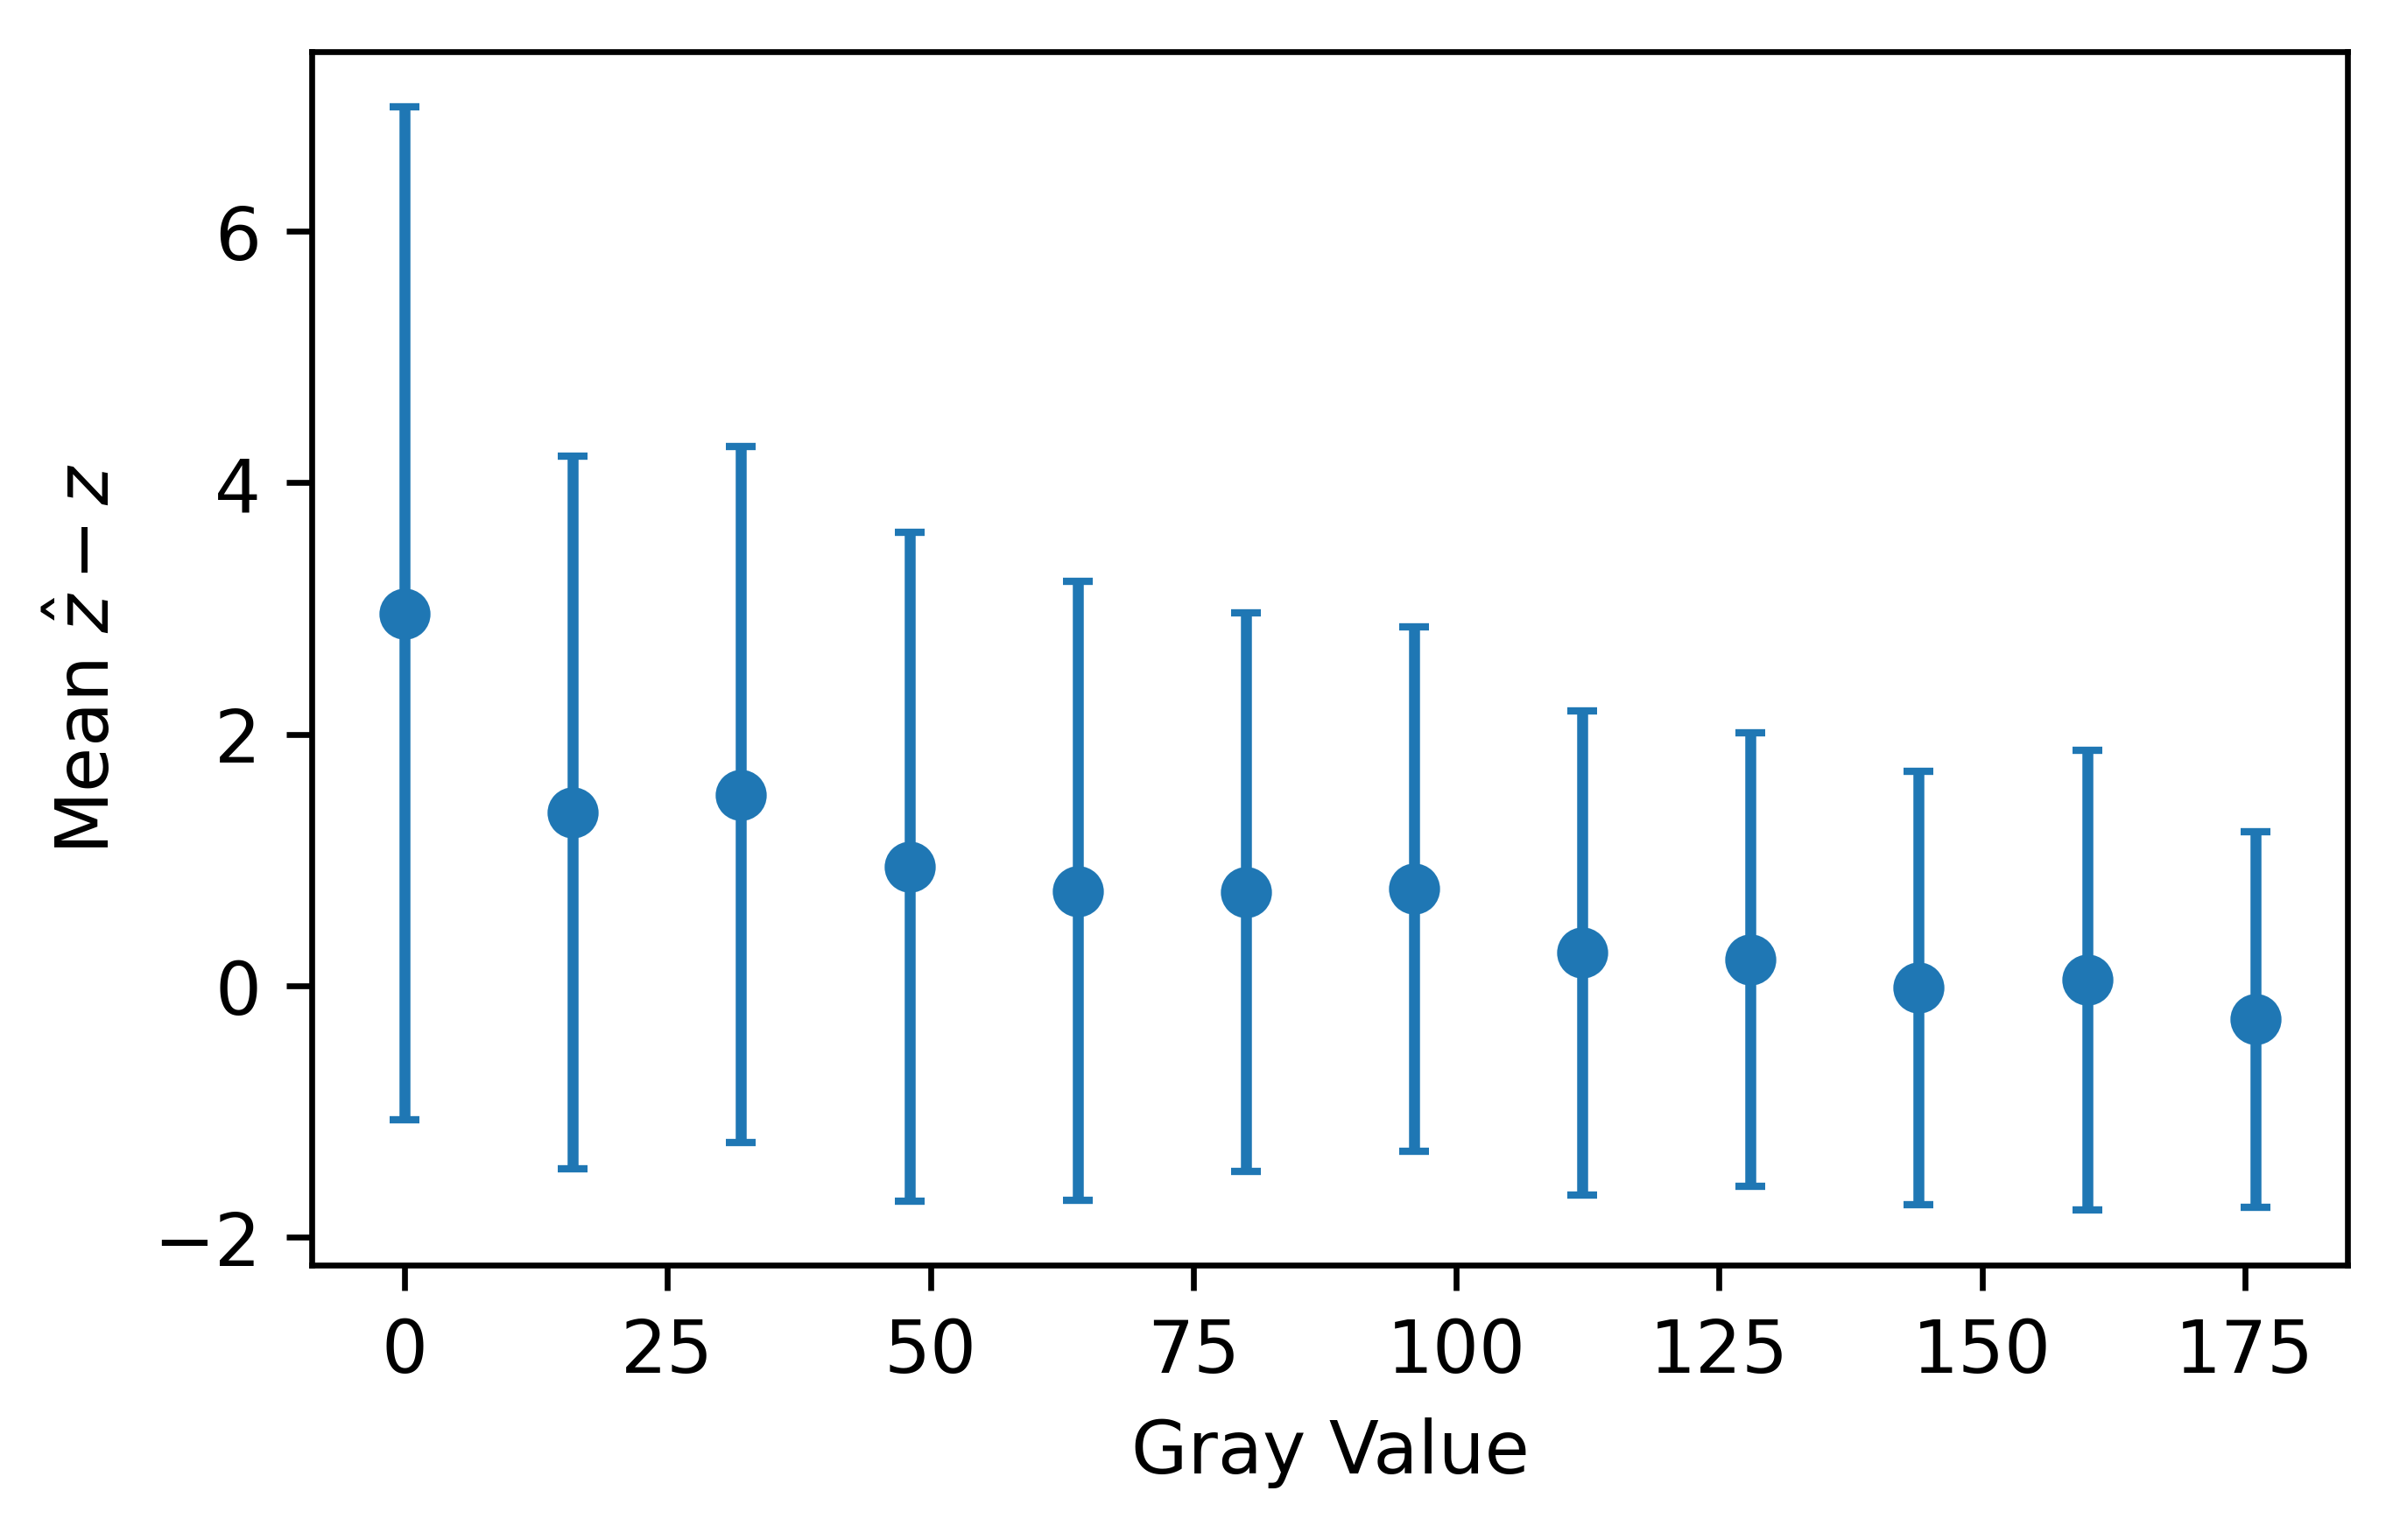

In [73]:
with plot_and_save('albedo_mean_and_std'):
    vals = []
    mean_values = []
    std_values = []
    for d, stats in individual_z.items():
        probs = stats['probs']
        if d % 2 == 1:
            continue
        vals.append((d // 2) * 16)
        mean_values.append(stats['mean'])
        std_values.append(stats['std'])
    plt.errorbar(vals, mean_values, yerr=std_values, fmt='o', capsize=2)
    plt.xlabel('Gray Value')
    plt.ylabel('Mean $\\hat{z} - z$')

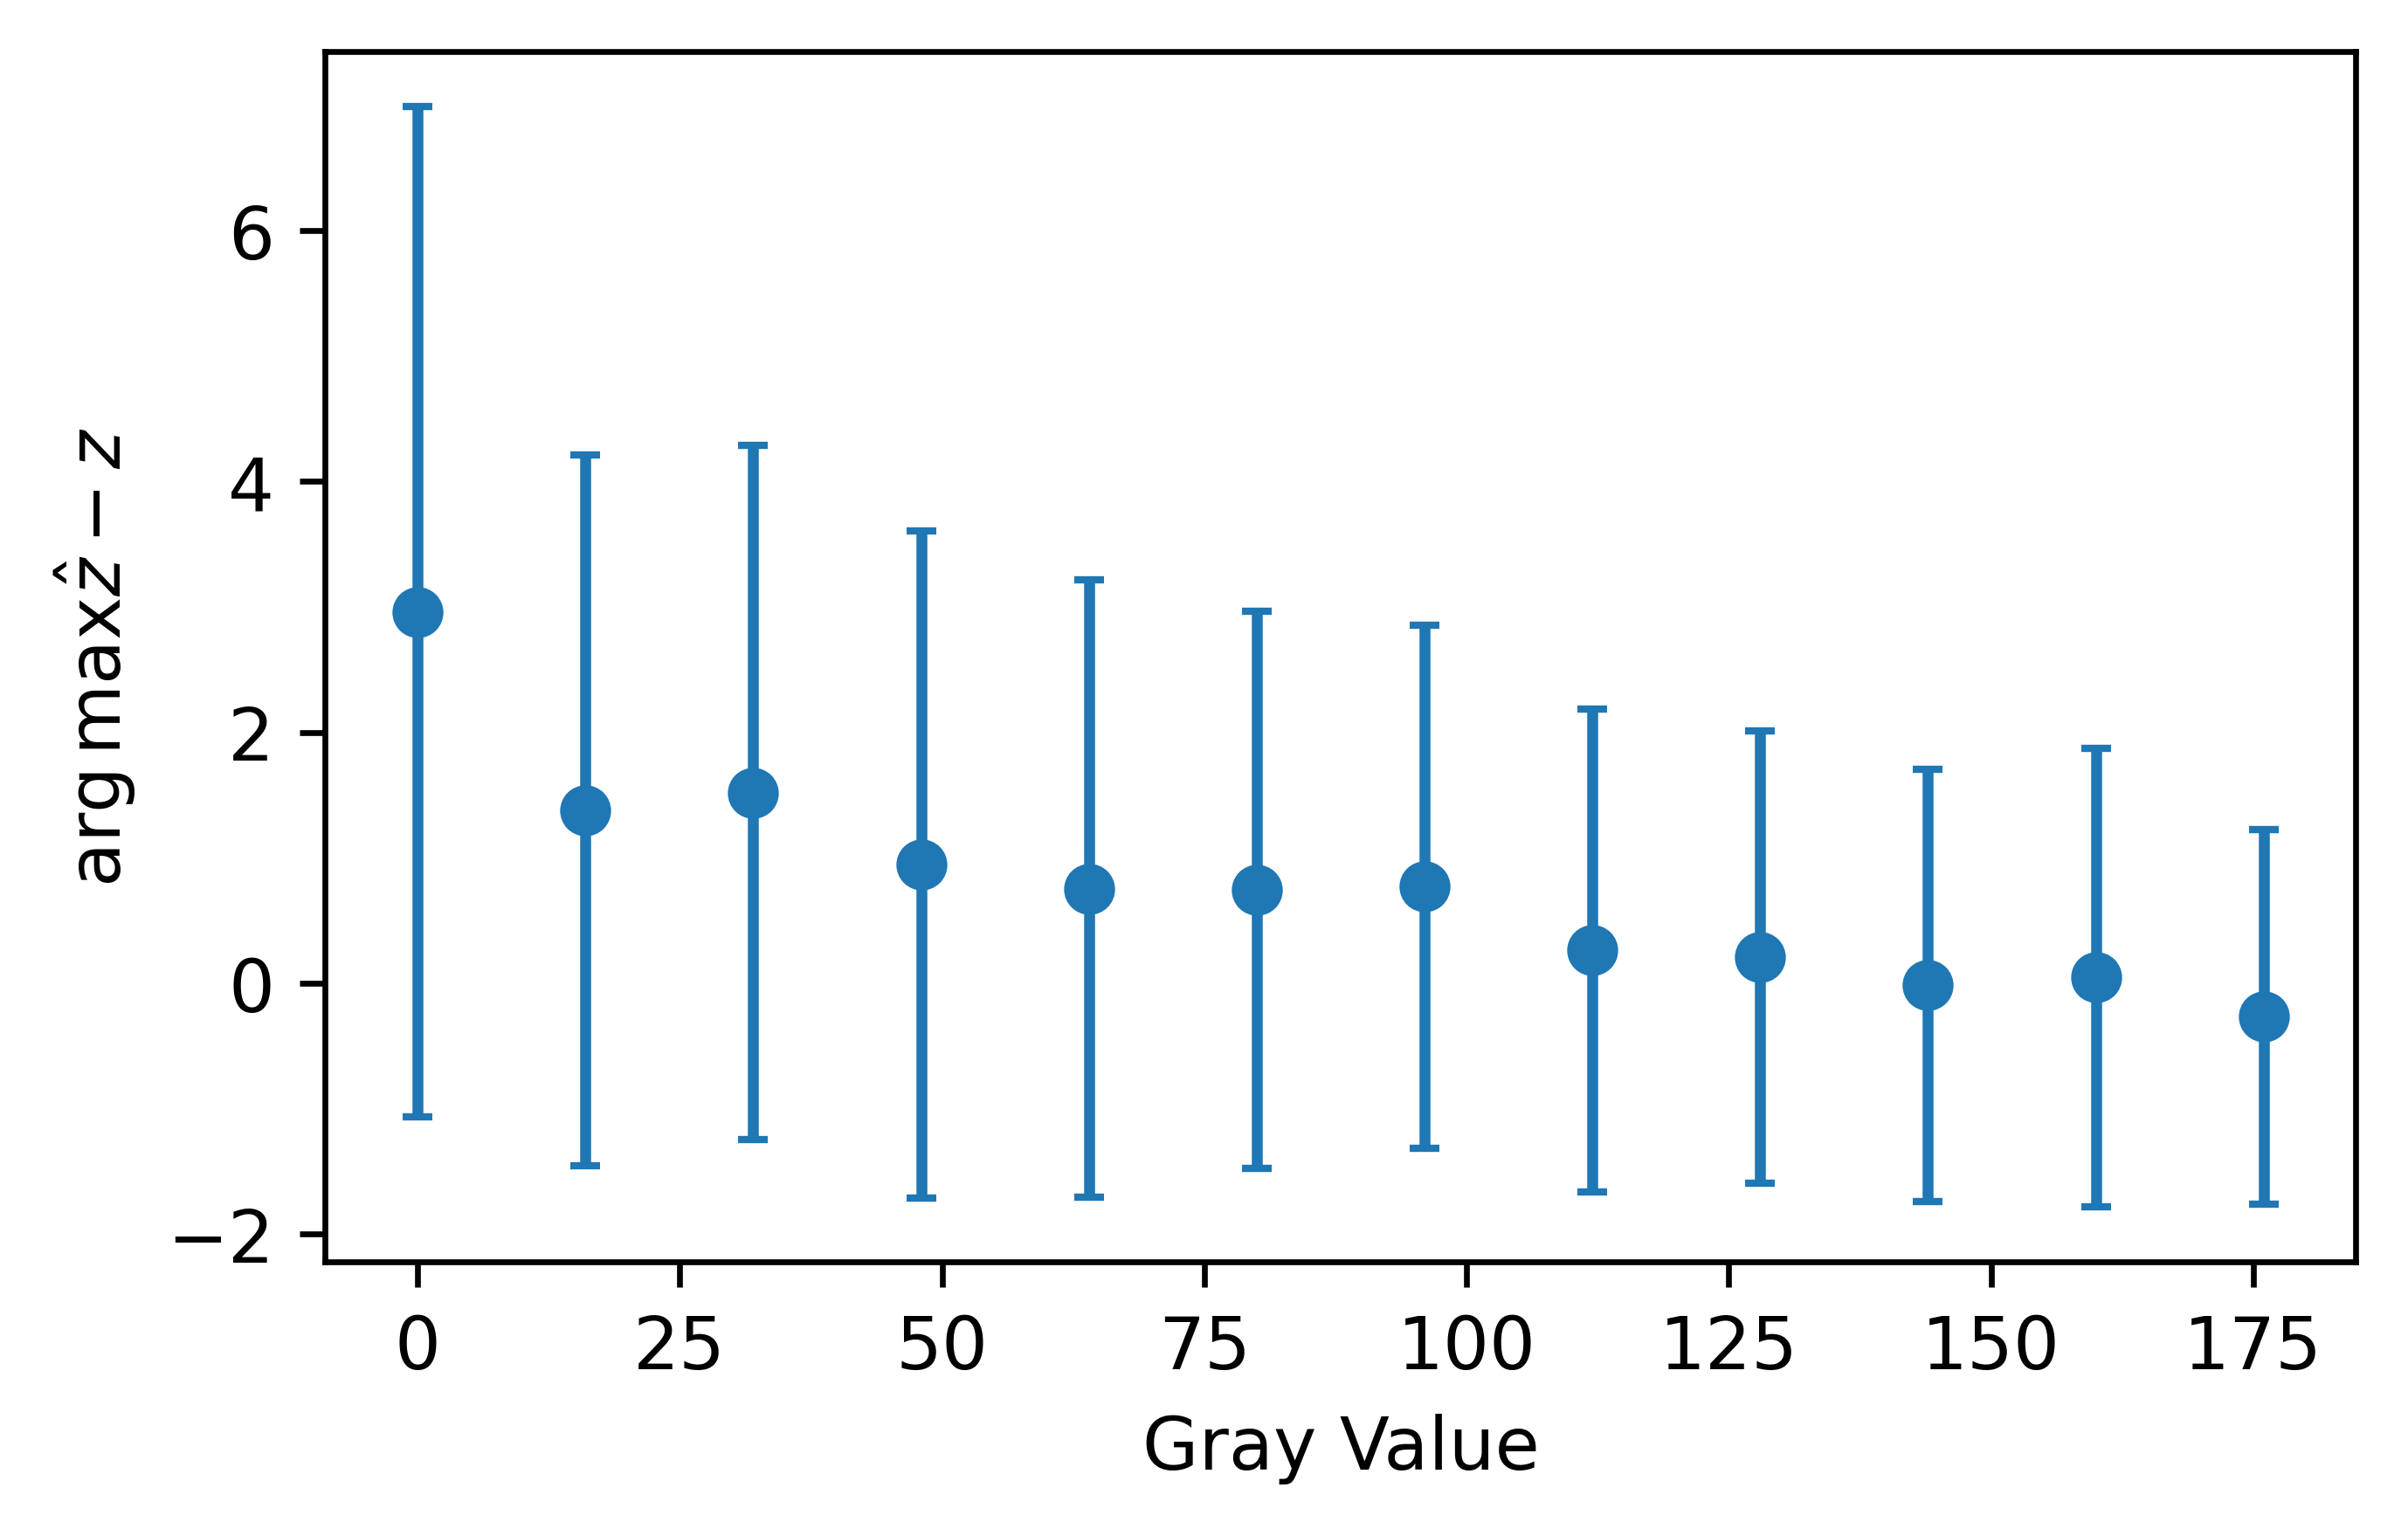

In [74]:
with plot_and_save('albedo_mode_and_std'):
    xs = np.linspace(-10, 10, 1000)
    vals = []
    modes = []
    std_values = []
    for d, stats in individual_z.items():
        probs = stats['probs']
        if d % 2 == 1:
            continue
        vals.append((d // 2) * 16)
        modes.append(xs[np.argmax(probs)])
        std_values.append(stats['std'])
    plt.errorbar(vals, mean_values, yerr=std_values, fmt='o', capsize=2)
    plt.xlabel('Gray Value')
    plt.ylabel(r'$\arg\max \hat{z} - z$')